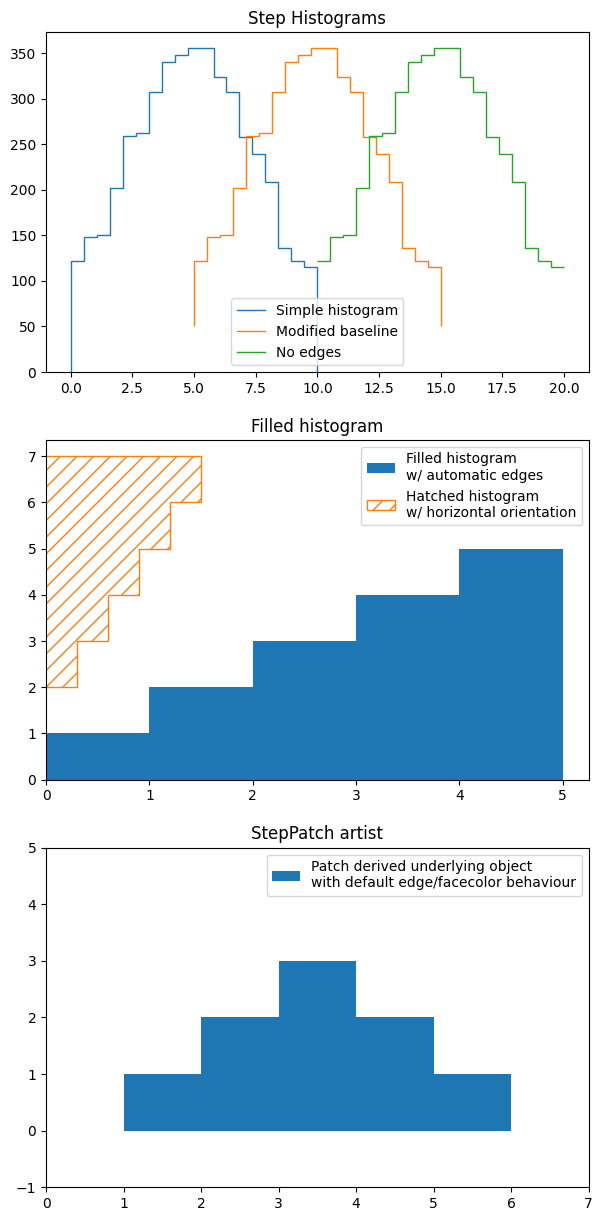

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import StepPatch

np.random.seed(0)
h, edges = np.histogram(np.random.normal(5, 3, 5000),
                        bins=np.linspace(0, 10, 20))

fig, axs = plt.subplots(3, 1, figsize=(7, 15))
axs[0].stairs(h, edges, label='Simple histogram')
axs[0].stairs(h, edges + 5, baseline=50, label='Modified baseline')
axs[0].stairs(h, edges + 10, baseline=None, label='No edges')
axs[0].set_title("Step Histograms")

axs[1].stairs(np.arange(1, 6, 1), fill=True,
              label='Filled histogram\nw/ automatic edges')
axs[1].stairs(np.arange(1, 6, 1)*0.3, np.arange(2, 8, 1),
              orientation='horizontal', hatch='//',
              label='Hatched histogram\nw/ horizontal orientation')
axs[1].set_title("Filled histogram")

patch = StepPatch(values=[1, 2, 3, 2, 1],
                  edges=range(1, 7),
                  label=('Patch derived underlying object\n'
                         'with default edge/facecolor behaviour'))
axs[2].add_patch(patch)
axs[2].set_xlim(0, 7)
axs[2].set_ylim(-1, 5)
axs[2].set_title("StepPatch artist")

for ax in axs:
    ax.legend()
plt.show()

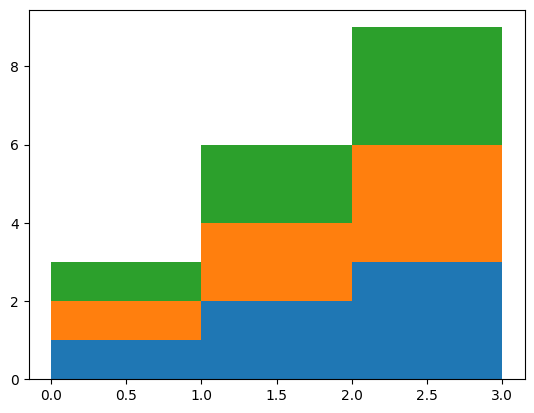

In [2]:
A = [[0, 0, 0],
     [1, 2, 3],
     [2, 4, 6],
     [3, 6, 9]]

for i in range(len(A) - 1):
    plt.stairs(A[i+1], baseline=A[i], fill=True)

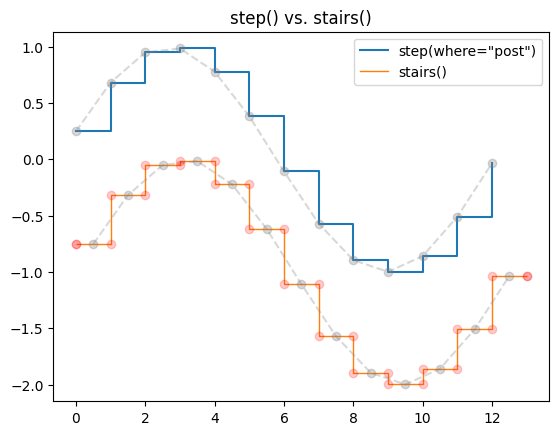

In [3]:
bins = np.arange(14)
centers = bins[:-1] + np.diff(bins) / 2
y = np.sin(centers / 2)

plt.step(bins[:-1], y, where='post', label='step(where="post")')
plt.plot(bins[:-1], y, 'o--', color='grey', alpha=0.3)

plt.stairs(y - 1, bins, baseline=None, label='stairs()')
plt.plot(centers, y - 1, 'o--', color='grey', alpha=0.3)
plt.plot(np.repeat(bins, 2), np.hstack([y[0], np.repeat(y, 2), y[-1]]) - 1,
         'o', color='red', alpha=0.2)

plt.legend()
plt.title('step() vs. stairs()')
plt.show()

In [ ]:
# 실행 후 삭제

import numpy as np
import matplotlib.pyplot as plt

fs = 1000                       # 샘플링 주파수
t = np.arange(0, 1, 1/fs)       
frequency = 5
signal = np.sin(2 * np.pi * frequency * t)

desired_snr_db = 20             # 20dB SNR

signal_power = np.mean(signal ** 2)

desired_snr_linear = 10 ** (desired_snr_db / 10)
noise_power = signal_power / desired_snr_linear

noise = np.sqrt(noise_power) * np.random.normal(size=signal.shape)

noisy_signal = signal + noise

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Noisy Signal (with SNR = {} dB)'.format(desired_snr_db))
plt.tight_layout()
plt.show()